<h1 align="center"><b>Máquinas de Vectores de Soporte</b>
<hr>

##Instalacion de librerias

1. Necesitamos instalar la libreria tm (text-mining)
> Nos servirá para poder crear un corpus, que es un objeto para manipular cada una de las palabras de nuestros tweets.

In [8]:
install.packages('tm')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘NLP’, ‘slam’


Loading required package: NLP



In [9]:
library(tm)

2. Cargamos nuestro dataset al servidor que ejecute R, este dataset se obtuvo en la fase de preprocesamiento, significa que los tweets ya están tokenizados y limpios

## Exploración de datos preprocesados

In [4]:
tweets <- read.csv("vacuna_dataset_preprocesado.csv", sep=",")

3. Exploramos nuestro dataset, recordemos que lo clasificamos en positivos (1) y negativos (0)

In [5]:
#tenemos 1412 tweets positivos y 629 tweets negativos
table(tweets$Label)


   0    1 
 629 1412 

4. El corpus es un conjunto de textos, aqui vemos un poco detallado como es el corpus en R

In [11]:
#Creamos un corpus a partir del texto preprocesado
corpus = Corpus(VectorSource(tweets$Clean.Tweet))
length(corpus)
content(corpus[[20]])

[1] 2041

[1] "putin involv thi too franakviacorka weapon use the militari and kgb group alpha injur and kill natalya lubnevskaya from nasha niva wa wound and now the hospit anoth colleagu from wa lucki and the bullet pass"


## Vectorización de los datos

5. Creamos una matriz, la cual tendrá como filas el tweet completo y como columnas cada uno de los terminos encontrados, la posición [i, j] son las cantidades de veces que la palabra se encontró en dicho tweet.

In [12]:
frequencies <- DocumentTermMatrix(corpus)

In [13]:
#Tiene 2041 tweets (filas)
#Tiene 6976 terminos (columnas)
#la palabra mas larga tiene 31 caracteres
frequencies

<<DocumentTermMatrix (documents: 2041, terms: 6976)>>
Non-/sparse entries: 52158/14185858
Sparsity           : 100%
Maximal term length: 31
Weighting          : term frequency (tf)

In [14]:
inspect(frequencies[800:805, 505:515])

<<DocumentTermMatrix (documents: 6, terms: 11)>>
Non-/sparse entries: 1/65
Sparsity           : 98%
Maximal term length: 12
Weighting          : term frequency (tf)
Sample             :
     Terms
Docs  agent amp repleezeldin serv smile soldier soleimani straight taliban uber
  800     0   0            0    0     0       0         0        0       0    0
  801     0   0            0    0     0       0         0        0       0    0
  802     0   0            0    0     0       0         0        0       0    0
  803     0   0            0    0     1       0         0        0       0    0
  804     0   0            0    0     0       0         0        0       0    0
  805     0   0            0    0     0       0         0        0       0    0


In [15]:
findFreqTerms(frequencies, lowfreq = 50)

[1] "here"            "putin"           "realdonaldtrump" "russia"         
  [5] "that"            "vaccin"          "vladimir"        "when"           
  [9] "who"             "you"             "and"             "been"           
 [13] "bidenharri"      "can"             "elect"           "expert"         
 [17] "for"             "like"            "one"             "the"            
 [21] "there"           "think"           "were"            "whi"            
 [25] "would"           "ever"            "from"            "get"            
 [29] "had"             "most"            "russian"         "use"            
 [33] "well"            "donald"          "time"            "trump"          
 [37] "look"            "new"             "with"            "gop"            
 [41] "have"            "now"             "right"           "should"         
 [45] "their"           "befor"           "harri"           "her"            
 [49] "just"            "kamala"          "out"             "she"            
 [53] "could"           "covid"           "develop"         "over"           
 [57] "say"             "veri"            "year"            "after"          
 [61] "but"             "more"            "take"            "all"            
 [65] "him"             "other"           "state"           "they"           
 [69] "will"            "not"             "onli"            "own"            
 [73] "peopl"           "test"            "come"            "see"            
 [77] "support"         "thi"             "are"             "presid"         
 [81] "via"             "belaru"          "kill"            "live"           
 [85] "safe"            "tri"             "against"         "daughter"       
 [89] "doesn"           "trial"           "day"             "trust"          
 [93] "about"           "into"            "today"           "first"          
 [97] "put"             "world"           "too"             "nation"         
[101] "our"             "want"            "win"             "don"            
[105] "how"             "know"            "let"             "noth"           
[109] "start"           "work"            "ani"             "biden"          
[113] "even"            "leader"          "news"            "then"           
[117] "better"          "democrat"        "effect"          "republican"     
[121] "said"            "sinc"            "than"            "what"           
[125] "american"        "back"            "great"           "your"           
[129] "countri"         "good"            "happen"          "soldier"        
[133] "amp"             "becom"           "help"            "mani"           
[137] "down"            "vote"            "claim"           "coronaviru"     
[141] "care"            "need"            "doe"             "got"            
[145] "some"            "thing"           "alreadi"         "believ"         
[149] "much"            "sputnik"         "make"            "last"           
[153] "still"           "love"            "becaus"          "realli"         
[157] "way"             "intellig"        "call"            "name"           
[161] "tell"            "lie"             "announc"         "america"        
[165] "person"          "while"           "give"            "joe"            
[169] "bounti"          "viru"            "puppet"          "approv"         
[173] "did"             "them"            "those"           "regist"         
[177] "question"

In [16]:
#Ahora solo trabajaremos con los terminos que mas se repiten
#Con esta funcion sacamos lo mas usado
sparse <- removeSparseTerms(frequencies, 0.995)
sparse

<<DocumentTermMatrix (documents: 2041, terms: 754)>>
Non-/sparse entries: 38947/1499967
Sparsity           : 97%
Maximal term length: 17
Weighting          : term frequency (tf)

In [17]:
#Creamos un dataframe para trabajar con SVM
tweetsSparse <- as.data.frame(as.matrix(sparse))

#Asignamos a nuestro dataframe una columna con cada palabra
colnames(tweetsSparse) = make.names(colnames(tweetsSparse))

#Asignamos el valor de la clasificacion del tweet en una nueva columna
tweetsSparse$sentiment <- tweets$Label

## MAQUINA DE SOPORTE DE VECTORES

In [18]:
install.packages('caTools')
install.packages('caret')
install.packages('e1071')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘data.table’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [24]:
library(caret)
library(caTools)
library(e1071)
library(plyr)

In [21]:
#Seteamos el valor raiz en R para valores replicables
set.seed(12)

6. De nuestro dataset preprocesado y clasificado, seccionaremos el dataset en data para test y data para entrenamiento para nuestor SVM

In [22]:
#Crearemos a partir de nuestro dataset, data para entrenamiento y data para test
#Asignamos un 80% de la data para entrenamiento y 20% para test
split <- sample.split(tweetsSparse$sentiment, SplitRatio =  0.8)

trainSparse = subset(tweetsSparse, split == TRUE)
testSparse = subset(tweetsSparse, split == FALSE)

In [23]:
#282 tweets son positivos en test
#126 tweets son negativos en test
#El modelo solo clasificará positivos
table(test$sentiment)


  0   1 
126 282 

7. Creamos el SVM, donde recibirá dos parametros, uno será la variable dependiente, que en este caso es lo que queremos predecir, en este caso, el sentimiento. Y el otro parametro es la data para entrenamiento.

In [25]:
#SVM recibe como primer parametro la variable dependiente (sentimiento)
#Como sentimiento es 0 o 1 R debe tratarlo como factor
#~. significa que trabajará con todas las variables
#El modelo trabajará con la data de entrenamiento
SVM <- svm(as.factor(sentiment)~., data = trainSparse)

In [26]:
summary(SVM)


Call:
svm(formula = as.factor(sentiment) ~ ., data = trainSparse)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  1329

 ( 835 494 )


Number of Classes:  2 

Levels: 
 0 1




8. Crearemos un objeto para predecir, en este recibirá como parametros la maquina de soporte de vectores y se le aplicará a la nueva data, en este caso la data de test.

In [33]:
#Crearemos un objeto para la prediccion, el cual usaremos el train SVM y pasaremos como datos el test
predictsSVM <- predict(SVM, newdata = testSparse)

In [35]:
confusionMatrix(predictsSVM, as.factor(testSparse$sentiment))

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0  18   5
         1 108 277
                                          
               Accuracy : 0.723           
                 95% CI : (0.6769, 0.7659)
    No Information Rate : 0.6912          
    P-Value [Acc > NIR] : 0.08926         
                                          
                  Kappa : 0.1617          
                                          
 Mcnemar's Test P-Value : < 2e-16         
                                          
            Sensitivity : 0.14286         
            Specificity : 0.98227         
         Pos Pred Value : 0.78261         
         Neg Pred Value : 0.71948         
             Prevalence : 0.30882         
         Detection Rate : 0.04412         
   Detection Prevalence : 0.05637         
      Balanced Accuracy : 0.56256         
                                          
       'Positive' Class : 0               
                              

In [36]:
install.packages('wordcloud')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [37]:
library(wordcloud)

Loading required package: RColorBrewer



8. Para tener una visualizacion de como actua la clasificación, veremos la información pertinente a esto.

In [38]:
positive <- subset(tweetsSparse, tweetsSparse$sentiment == 1)
positive$sentiment <- NULL
positivas <- as.data.frame(colSums(positive))

In [39]:
positivas

,colSums(positive)
,<dbl>
avail,13
boy,13
here,47
putin,1589
realdonaldtrump,111
russia,524
that,537
vaccin,869
vladimir,214


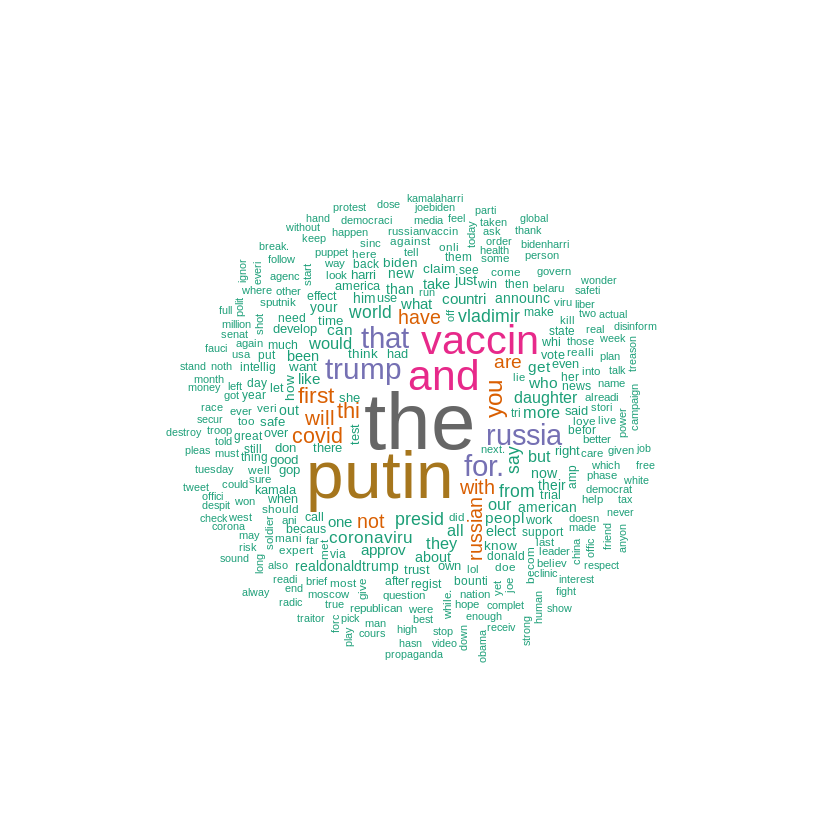

In [41]:
positivas$words <- row.names(positivas)
colnames(positivas) <- c("freq", "word")
wordcloud(positivas$word, positivas$freq, random.order = FALSE, colors=brewer.pal(8, "Dark2"), max.words=300)